Load the dataset and inspect it.

In [57]:
import pandas as pd

In [58]:
df = pd.read_csv('customer_spending.csv')
df.head()

,Customer_ID,Age,Annual_Income,Spending_Score,Region,Purchased,Customer_Satisfaction
0,1,56,22695.0,62,West,No,2
1,2,46,68190.0,58,South,Yes,10
2,3,32,25258.0,52,North,No,3
3,4,60,107538.0,12,East,No,1
4,5,25,59504.0,39,North,Yes,8


In [59]:
df.isnull().sum()

Customer_ID              0
Age                      0
Annual_Income            9
Spending_Score           0
Region                   0
Purchased                0
Customer_Satisfaction    0
dtype: int64

Handle missing values.

In [60]:
from sklearn.impute import SimpleImputer

In [61]:
si = SimpleImputer(strategy='mean')

In [62]:
df['Annual_Income'] = si.fit_transform(df[['Annual_Income']])

In [63]:
df.head()

,Customer_ID,Age,Annual_Income,Spending_Score,Region,Purchased,Customer_Satisfaction
0,1,56,22695.0,62,West,No,2
1,2,46,68190.0,58,South,Yes,10
2,3,32,25258.0,52,North,No,3
3,4,60,107538.0,12,East,No,1
4,5,25,59504.0,39,North,Yes,8


Encode categorical data (e.g., one-hot or label encoding).

In [64]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
df['Region'] = ohe.fit_transform(df[['Region']])

In [65]:
df.head()

,Customer_ID,Age,Annual_Income,Spending_Score,Region,Purchased,Customer_Satisfaction
0,1,56,22695.0,62,0.0,No,2
1,2,46,68190.0,58,0.0,Yes,10
2,3,32,25258.0,52,0.0,No,3
3,4,60,107538.0,12,1.0,No,1
4,5,25,59504.0,39,0.0,Yes,8


In [66]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Purchased'] = le.fit_transform(df['Purchased'])
df.head()

,Customer_ID,Age,Annual_Income,Spending_Score,Region,Purchased,Customer_Satisfaction
0,1,56,22695.0,62,0.0,0,2
1,2,46,68190.0,58,0.0,1,10
2,3,32,25258.0,52,0.0,0,3
3,4,60,107538.0,12,1.0,0,1
4,5,25,59504.0,39,0.0,1,8


Scale numerical features (e.g., standardization or normalization).

In [67]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_features  = ss.fit_transform(df.drop(columns=['Spending_Score']))
df_scaled = pd.DataFrame(scaled_features, columns=df.columns.drop("Spending_Score"))
df_scaled.head()


,Customer_ID,Age,Annual_Income,Region,Purchased,Customer_Satisfaction
0,-1.714816,1.086153,-1.664547,-0.484322,-0.850963,-1.122526
1,-1.680173,0.367798,-0.054973,-0.484322,1.175139,1.421442
2,-1.645531,-0.637899,-1.573870,-0.484322,-0.850963,-0.804530
3,-1.610888,1.373495,1.337125,2.064742,-0.850963,-1.440522
4,-1.576245,-1.140748,-0.362276,-0.484322,1.175139,0.785450


Train and compare multiple regression models (Linear Regression, Random Forest, Ridge).

In [70]:
from sklearn.model_selection import train_test_split
x =df.drop(columns=['Customer_ID','Region'])
y = df.iloc[:,3].values
y = df['Spending_Score']
y

0     62
1     58
2     52
3     12
4     39
      ..
95    72
96    36
97    38
98    84
99    99
Name: Spending_Score, Length: 100, dtype: int64

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [72]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [76]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred)
r2_score

1.0

In [82]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=42)
rfr.fit(x_train, y_train)
y_pred = rfr.predict(x_test)

In [84]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test,y_pred)
r2_score

0.9992535348479703

In [87]:
from sklearn.linear_model import Ridge
r = Ridge()
r.fit(x_train, y_train)
y_pred=r.predict(x_test)


In [88]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test,y_pred)
r2_score

0.9999999997882846

In [89]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

In [90]:
mse

2.3687993396021585e-07

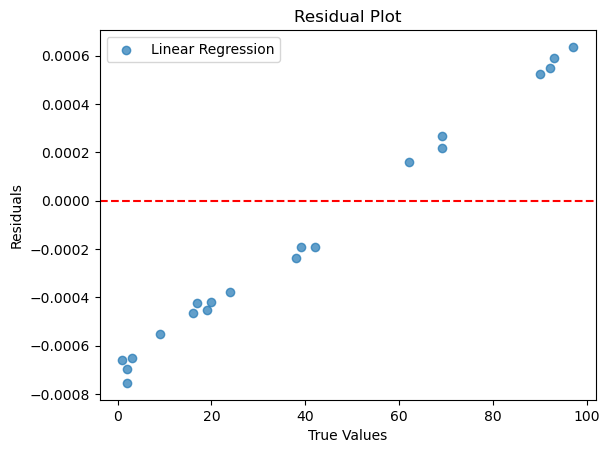

In [92]:
import matplotlib.pyplot as plt

# Residual plot for Linear Regression
plt.scatter(y_test, y_test - y_pred, label="Linear Regression", alpha=0.7)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residual Plot")
plt.xlabel("True Values")
plt.ylabel("Residuals")
plt.legend()
plt.show()

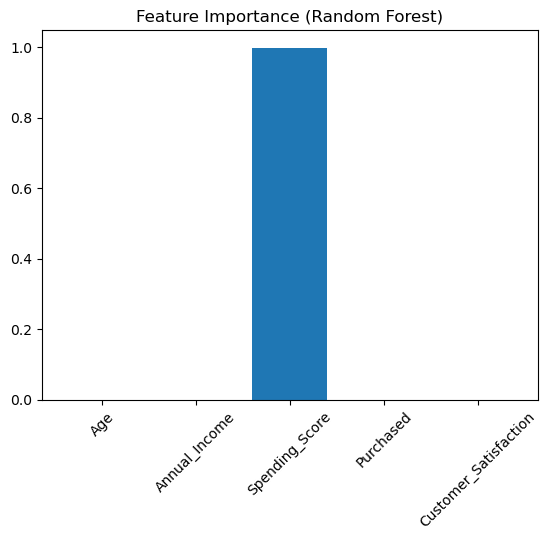

In [95]:
# Feature importance for Random Forest
importances = rfr.feature_importances_
plt.bar(x.columns, importances)
plt.title("Feature Importance (Random Forest)")
plt.xticks(rotation=45)
plt.show()

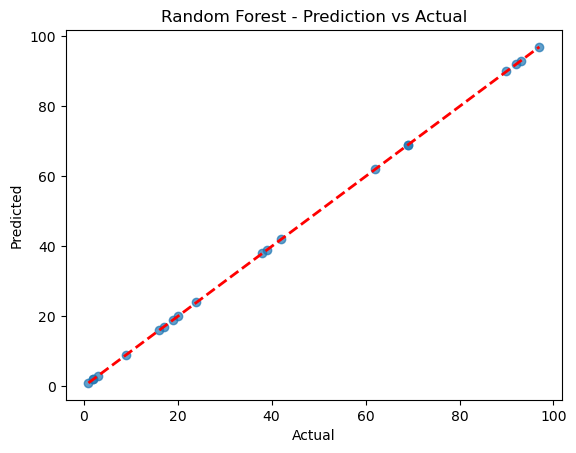

In [96]:
# Prediction vs Actual
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Random Forest - Prediction vs Actual")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()